### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

### Sample Timeseries

In [2]:
np.random.seed(10) # Reproducible results

time = pd.date_range(start="2021-03-01", end="2021-04-08").to_pydatetime().tolist()
print("Time:")
print(type(time))
print(time,"\n")

value = np.random.uniform(low=0, high=10, size=(len(time),)).astype(int)
print("Money Demand:")
print(type(value))
print(value)

df = pd.DataFrame({"Time":time,"MoneyDemand":value})
df.index = df.Time.tolist()
df.head(5)

Time:
<class 'list'>
[datetime.datetime(2021, 3, 1, 0, 0), datetime.datetime(2021, 3, 2, 0, 0), datetime.datetime(2021, 3, 3, 0, 0), datetime.datetime(2021, 3, 4, 0, 0), datetime.datetime(2021, 3, 5, 0, 0), datetime.datetime(2021, 3, 6, 0, 0), datetime.datetime(2021, 3, 7, 0, 0), datetime.datetime(2021, 3, 8, 0, 0), datetime.datetime(2021, 3, 9, 0, 0), datetime.datetime(2021, 3, 10, 0, 0), datetime.datetime(2021, 3, 11, 0, 0), datetime.datetime(2021, 3, 12, 0, 0), datetime.datetime(2021, 3, 13, 0, 0), datetime.datetime(2021, 3, 14, 0, 0), datetime.datetime(2021, 3, 15, 0, 0), datetime.datetime(2021, 3, 16, 0, 0), datetime.datetime(2021, 3, 17, 0, 0), datetime.datetime(2021, 3, 18, 0, 0), datetime.datetime(2021, 3, 19, 0, 0), datetime.datetime(2021, 3, 20, 0, 0), datetime.datetime(2021, 3, 21, 0, 0), datetime.datetime(2021, 3, 22, 0, 0), datetime.datetime(2021, 3, 23, 0, 0), datetime.datetime(2021, 3, 24, 0, 0), datetime.datetime(2021, 3, 25, 0, 0), datetime.datetime(2021, 3, 26, 0, 0),

,Time,MoneyDemand
2021-03-01,2021-03-01,7
2021-03-02,2021-03-02,0
2021-03-03,2021-03-03,6
2021-03-04,2021-03-04,7
2021-03-05,2021-03-05,4


### Train and Test Splits

In [3]:
train = df[df["Time"]<="2021-03-31"]
test = df[df["Time"]>"2021-03-31"]

print("Train:")
print(train.tail(5), "\n")
print("Test:")
print(test,"\n")

Train:
                 Time  MoneyDemand
2021-03-27 2021-03-27            6
2021-03-28 2021-03-28            5
2021-03-29 2021-03-29            6
2021-03-30 2021-03-30            6
2021-03-31 2021-03-31            8 

Test:
                 Time  MoneyDemand
2021-04-01 2021-04-01            5
2021-04-02 2021-04-02            9
2021-04-03 2021-04-03            3
2021-04-04 2021-04-04            0
2021-04-05 2021-04-05            3
2021-04-06 2021-04-06            1
2021-04-07 2021-04-07            8
2021-04-08 2021-04-08            0 



### Forecast: Simple Moving Average[Train Data]

In [4]:
simple_moving_average = train["MoneyDemand"].rolling(window=3).mean().tolist()
print("Simple Moving Average :")
print("---"*10)
print(simple_moving_average)

Simple Moving Average :
------------------------------
[nan, nan, 4.333333333333333, 4.333333333333333, 5.666666666666667, 4.333333333333333, 2.3333333333333335, 3.3333333333333335, 3.0, 2.6666666666666665, 2.3333333333333335, 5.0, 5.0, 4.666666666666667, 4.333333333333333, 6.333333333333333, 7.0, 5.0, 6.0, 6.0, 7.0, 4.333333333333333, 3.0, 3.3333333333333335, 4.333333333333333, 4.666666666666667, 4.666666666666667, 5.0, 5.666666666666667, 5.666666666666667, 6.666666666666667]


### Forecast: Simple Moving Average[Test Data]

In [7]:
forecast = test.copy(deep=True)
forecast["Simple_Moving_Average"] = forecast["MoneyDemand"].rolling(window=3).mean().tolist()#[-1]

forecast

,Time,MoneyDemand,Simple_Moving_Average
2021-04-01,2021-04-01,5,NaN
2021-04-02,2021-04-02,9,NaN
2021-04-03,2021-04-03,3,5.666667
2021-04-04,2021-04-04,0,4.000000
2021-04-05,2021-04-05,3,2.000000
2021-04-06,2021-04-06,1,1.333333
2021-04-07,2021-04-07,8,4.000000
2021-04-08,2021-04-08,0,3.000000


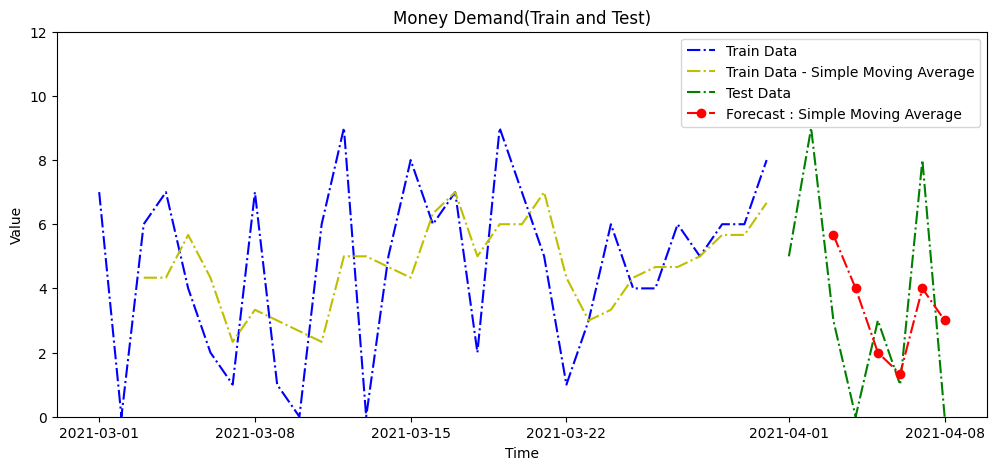

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

axes.plot(train.index, train.MoneyDemand, "b-.", label="Train Data")
axes.plot(train.index, simple_moving_average, "y-.", label="Train Data - Simple Moving Average")
axes.plot(test.index, test.MoneyDemand, "g-.", label="Test Data")
axes.plot(forecast.index, forecast.Simple_Moving_Average, "or-.", label="Forecast : Simple Moving Average")

axes.set_title("Money Demand(Train and Test)")
axes.set_ylabel("Value")
axes.set_xlabel("Time")

axes.set_ylim([0,12])

plt.legend(loc="upper right")
plt.show()

### Note : 

* Simple Moving Average : Using simple moving average model, we forecast the next value(s) in a time series based on the average of a fozed finite "p" of the previous values. Thus for all i > p.

> * yhat = 1/p(yi-1 + yi-2 + yi-3 ...... + yi-p)

In [12]:
rmse = sqrt(mean_squared_error(test.MoneyDemand[2:], forecast.Simple_Moving_Average[2:])) # 2: to avoid null values as initial first 2 values doesnt having rolling window 3 values
print(rmse)

2.8642108343667205


#### RMSE Manual

In [13]:
temp = []

for yhat, y in zip(test.MoneyDemand.tolist()[2:], forecast.Simple_Moving_Average.tolist()[2:]):
    value = (y - yhat)**2
    temp.append(value)

rmse = np.sqrt(np.sum(temp)/len(test))

print("RMSE:")
print(rmse)

RMSE:
2.480479344356203


Take Away Points

> * We can go for next methods like Weighted Moving Average and Exponential Smoothing methods and see how it performs and reduce RMSE value.

In [28]:
# train.to_csv("train.csv")
# test.to_csv("test.csv")
# forecast.to_csv("forecast.csv") 